# Heart Disease Prediction

### Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the CSV File

In [2]:
heart_data = pd.read_csv("heart.csv")

In [3]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Basic Data Exploration

In [4]:
heart_data.head() #Prints first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
heart_data.isnull().any() #To check null values in the dataset

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
heart_data.describe() #finding the description of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart_data.shape #Returns the Size of the Dataset

(1025, 14)

#### Finding outliers using Boxplot and removing them based on IQR Score 

<AxesSubplot:xlabel='age'>

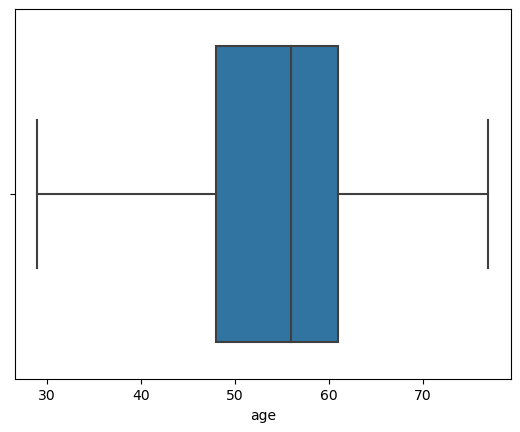

In [8]:
#Finding Outliers in 'age' Attribute
sns.boxplot(x=heart_data["age"])

<AxesSubplot:xlabel='sex'>

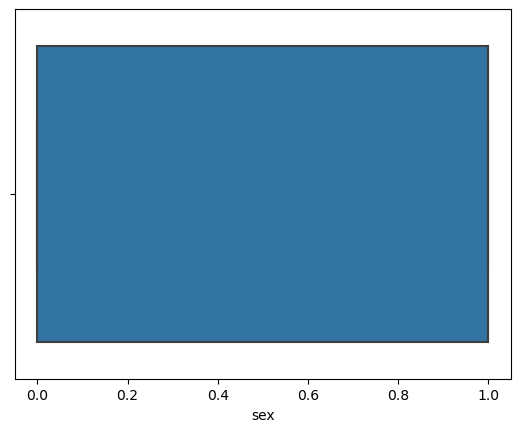

In [9]:
#Finding Outliers in 'sex' Attribute
sns.boxplot(x=heart_data["sex"])

<AxesSubplot:xlabel='cp'>

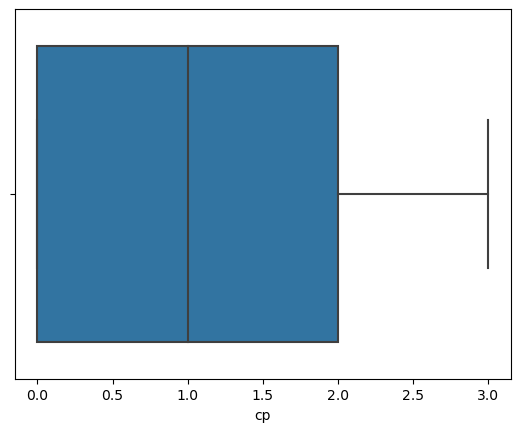

In [10]:
#Finding Outliers in 'cp' Attribute
sns.boxplot(x=heart_data["cp"])

<AxesSubplot:xlabel='trestbps'>

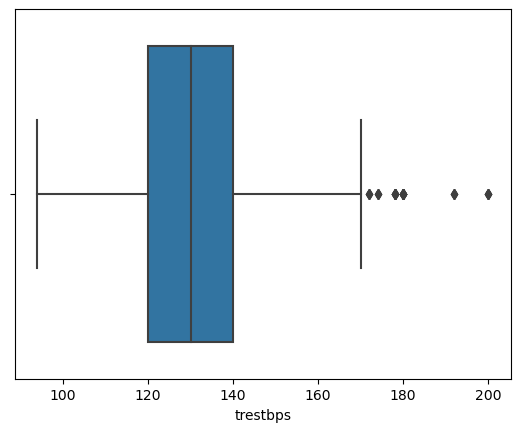

In [11]:
#Finding Outliers in 'trestbps' Attribute
sns.boxplot(x=heart_data["trestbps"])

In [12]:
#Finding Upper, Middle and lower Quartiles

Q1 = np.percentile(heart_data['trestbps'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(heart_data['trestbps'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(heart_data['trestbps'], 75, interpolation = 'midpoint') 

#Finding IQR
IQR = Q3-Q1

#Finding b_lower and b_upper
b_lower = Q1 - 1.5*IQR
b_upper = Q3 + 1.5*IQR

#Removing Outliers
cleaned_heart_data = heart_data[(heart_data.trestbps>b_lower) & (heart_data.trestbps<b_upper)]
cleaned_heart_data

C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\576761192.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(heart_data['trestbps'], 25, interpolation = 'midpoint')
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\576761192.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(heart_data['trestbps'], 50, interpolation = 'midpoint')
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\576761192.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<AxesSubplot:xlabel='trestbps'>

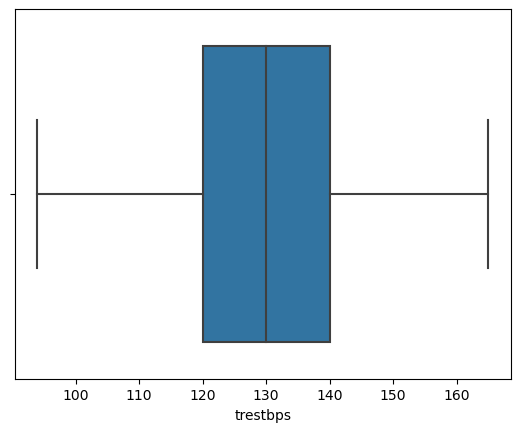

In [13]:
#Outlier-Free 'trestbps' Attribute
sns.boxplot(x=cleaned_heart_data["trestbps"])

<AxesSubplot:xlabel='chol'>

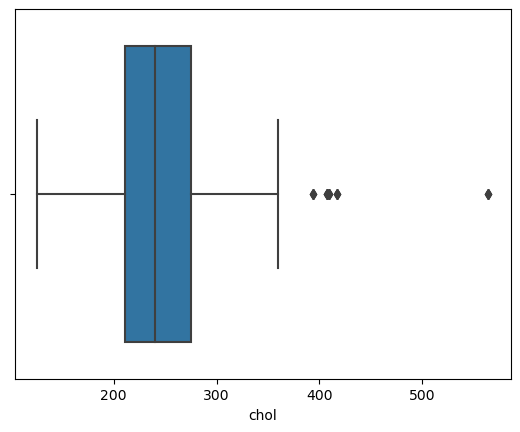

In [14]:
#Finding Outliers in 'chol' Attribute
sns.boxplot(x=heart_data["chol"])

In [15]:
#Finding Upper, Middle and lower Quartiles

Q1 = np.percentile(heart_data['chol'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(heart_data['chol'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(heart_data['chol'], 75, interpolation = 'midpoint') 

#Finding IQR
IQR = Q3-Q1

#Finding b_lower and b_upper
b_lower = Q1 - 1.5*IQR
b_upper = Q3 + 1.5*IQR

#Removing Outliers
cleaned_heart_data = cleaned_heart_data[(cleaned_heart_data.chol>b_lower) & (cleaned_heart_data.chol<b_upper)]
cleaned_heart_data

C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\1214168805.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(heart_data['chol'], 25, interpolation = 'midpoint')
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\1214168805.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(heart_data['chol'], 50, interpolation = 'midpoint')
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\1214168805.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
User

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<AxesSubplot:xlabel='chol'>

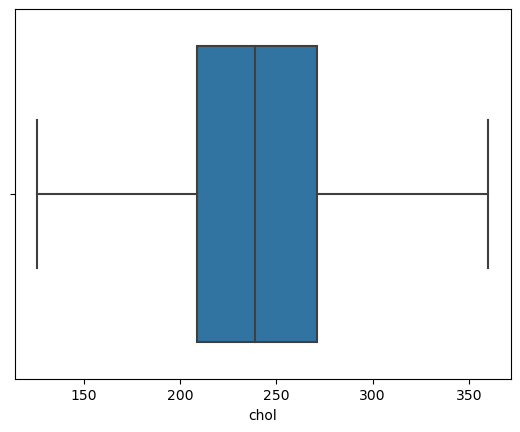

In [16]:
#Outlier-Free 'chol' Attribute
sns.boxplot(x=cleaned_heart_data["chol"])

<AxesSubplot:xlabel='restecg'>

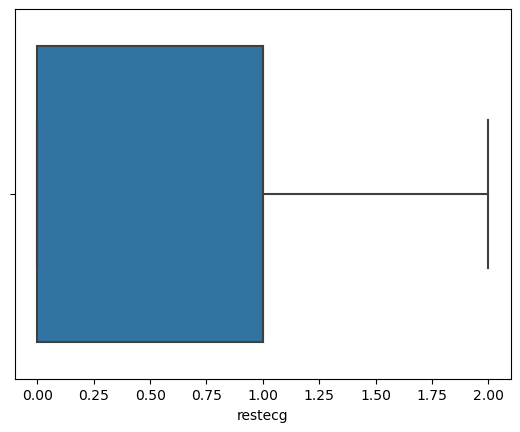

In [17]:
#Finding Outliers in 'restecg' Attribute
sns.boxplot(x=heart_data["restecg"])

<AxesSubplot:xlabel='thalach'>

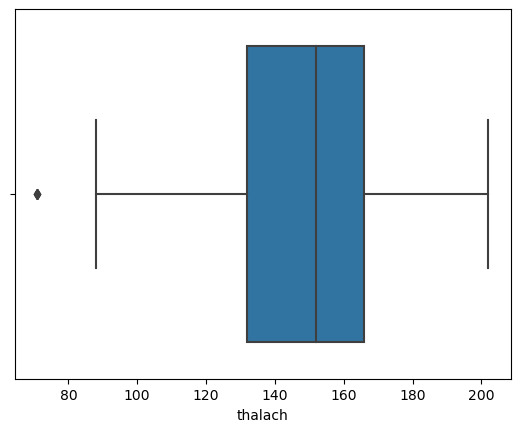

In [18]:
#Finding Outliers in 'thalach' Attribute
sns.boxplot(x=heart_data["thalach"])

In [19]:
#Finding Upper, Middle and lower Quartiles
Q1 = np.percentile(heart_data['thalach'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(heart_data['thalach'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(heart_data['thalach'], 75, interpolation = 'midpoint') 

#Finding IQR
IQR = Q3-Q1

#Finding b_lower and b_upper
b_lower = Q1 - 1.5*IQR
b_upper = Q3 + 1.5*IQR

#Removing Outliers
cleaned_heart_data = cleaned_heart_data[(cleaned_heart_data.thalach>b_lower) & (cleaned_heart_data.thalach<b_upper)]
cleaned_heart_data

C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\1363926908.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(heart_data['thalach'], 25, interpolation = 'midpoint')
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\1363926908.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(heart_data['thalach'], 50, interpolation = 'midpoint')
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\1363926908.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<AxesSubplot:xlabel='thalach'>

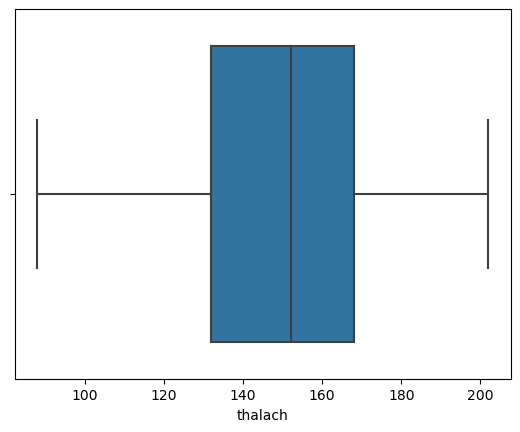

In [20]:
#Outlier-Free 'thalach' Attribute
sns.boxplot(x=cleaned_heart_data["thalach"])

<AxesSubplot:xlabel='exang'>

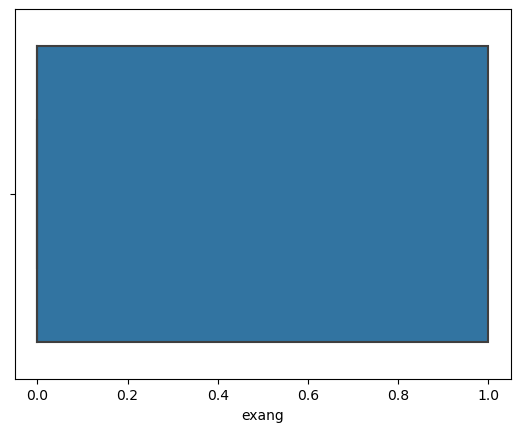

In [21]:
#Finding Outliers in 'exang' Attribute
sns.boxplot(x=heart_data["exang"])

<AxesSubplot:xlabel='ca'>

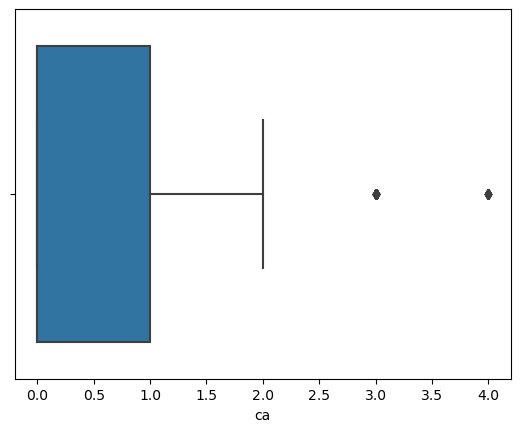

In [22]:
#Finding Outliers in 'ca' Attribute
sns.boxplot(x=heart_data["ca"])

In [23]:
#Finding Upper, Middle and lower Quartiles
Q1 = np.percentile(heart_data['ca'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(heart_data['ca'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(heart_data['ca'], 75, interpolation = 'midpoint') 

#Finding IQR
IQR = Q3-Q1

#Finding b_lower and b_upper
b_lower = Q1 - (1.5*IQR)
b_upper = Q3 + (1.5*IQR)

#Removing Outliers
cleaned_heart_data = cleaned_heart_data[(cleaned_heart_data.ca>b_lower) & (cleaned_heart_data.ca<b_upper)]
cleaned_heart_data

C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\3788599937.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(heart_data['ca'], 25, interpolation = 'midpoint')
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\3788599937.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(heart_data['ca'], 50, interpolation = 'midpoint')
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\3788599937.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<AxesSubplot:xlabel='ca'>

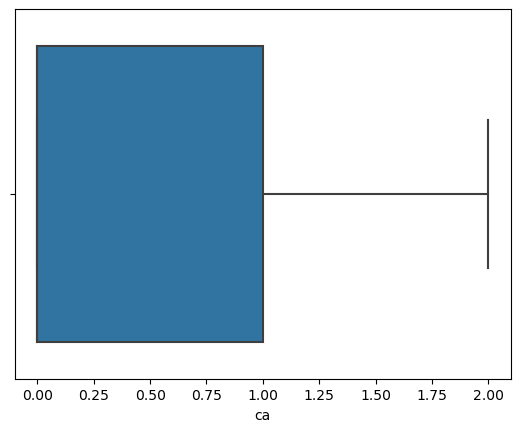

In [24]:
#Outlier-Free 'ca' Attribute
sns.boxplot(x=cleaned_heart_data["ca"])

<AxesSubplot:xlabel='slope'>

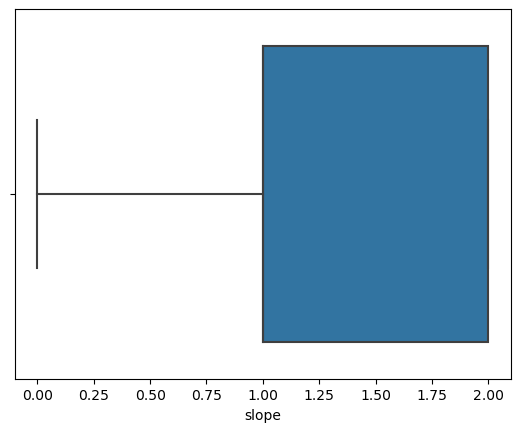

In [25]:
#Finding Outliers in 'slope' Attribute
sns.boxplot(x=heart_data["slope"])

<AxesSubplot:xlabel='thal'>

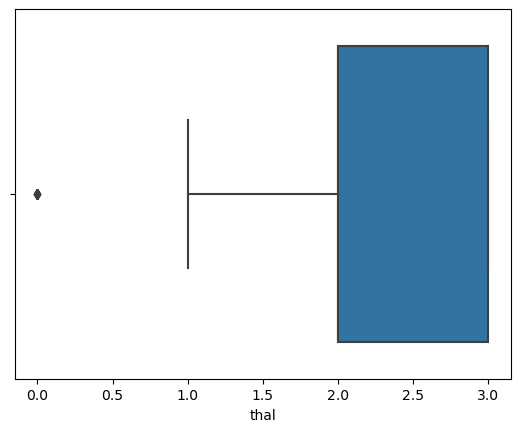

In [26]:
#Finding Outliers in 'thal' Attribute
sns.boxplot(x=heart_data["thal"])

In [27]:
#Finding Upper, Middle and lower Quartiles
Q1 = np.percentile(heart_data['thal'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(heart_data['thal'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(heart_data['thal'], 75, interpolation = 'midpoint') 

#Finding IQR
IQR = Q3-Q1

#Finding b_lower and b_upper
b_lower = Q1 - (1.5*IQR)
b_upper = Q3 + (1.5*IQR)

#Removing Outliers
cleaned_heart_data = cleaned_heart_data[(cleaned_heart_data.thal>b_lower) & (cleaned_heart_data.thal<b_upper)]
cleaned_heart_data

C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\1812877076.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(heart_data['thal'], 25, interpolation = 'midpoint')
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\1812877076.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(heart_data['thal'], 50, interpolation = 'midpoint')
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\1812877076.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
User

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<AxesSubplot:xlabel='thal'>

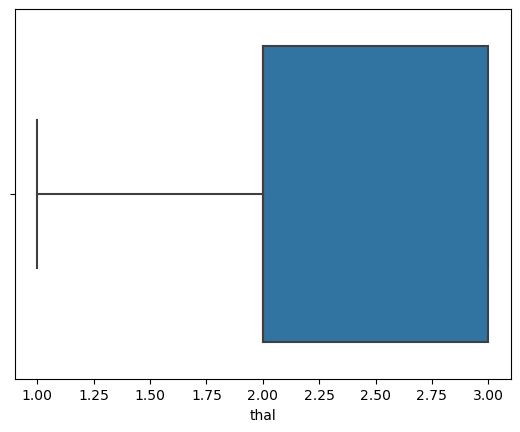

In [28]:
#Outlier-Free 'thal' Attribute
sns.boxplot(x=cleaned_heart_data["thal"])

<AxesSubplot:xlabel='oldpeak'>

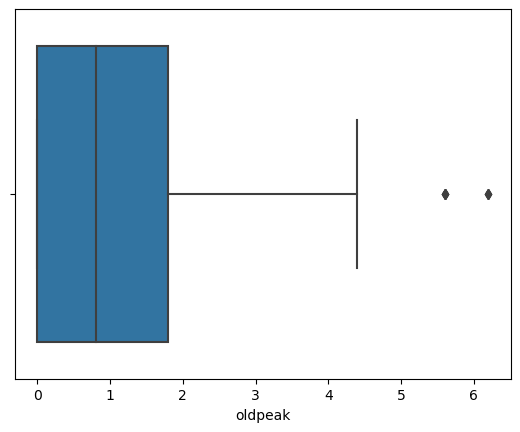

In [29]:
#Finding Outliers in 'oldpeak' Attribute
sns.boxplot(x=heart_data["oldpeak"])

In [30]:
#Finding Upper, Middle and lower Quartiles
Q1 = np.percentile(heart_data['oldpeak'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(heart_data['oldpeak'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(heart_data['oldpeak'], 75, interpolation = 'midpoint') 

#Finding IQR
IQR = Q3-Q1

#Finding b_lower and b_upper
b_lower = Q1 - (1.5*IQR)
b_upper = Q3 + (1.5*IQR)

#Removing Outliers
cleaned_heart_data = cleaned_heart_data[(cleaned_heart_data.oldpeak>b_lower) & (cleaned_heart_data.oldpeak<b_upper)]
cleaned_heart_data

C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\3253499531.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(heart_data['oldpeak'], 25, interpolation = 'midpoint')
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\3253499531.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(heart_data['oldpeak'], 50, interpolation = 'midpoint')
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\3253499531.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<AxesSubplot:xlabel='oldpeak'>

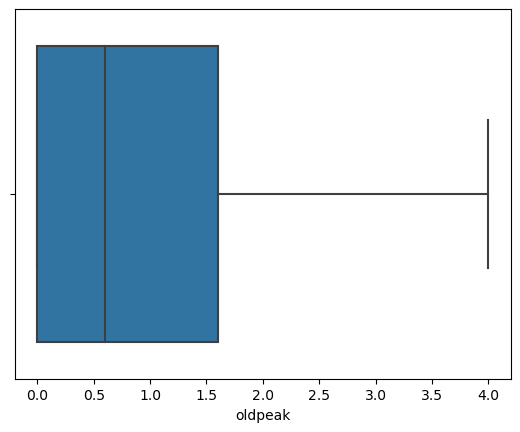

In [31]:
#Outlier-Free 'oldpeak' Attribute
sns.boxplot(x=cleaned_heart_data["oldpeak"])

In [32]:
cleaned_heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


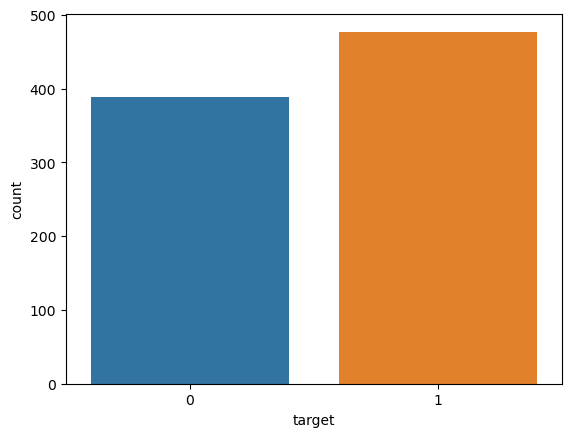

In [33]:
# count plot to check if the dataset is balanced

sns.countplot(cleaned_heart_data['target'])
 
# Show the plot
plt.show()

### Applying SMOTE - Synthetic Minority Oversampling TEchnique to balance the Dataset

In [34]:
X = cleaned_heart_data.drop("target",axis=True)

In [35]:
y = cleaned_heart_data["target"]

In [36]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))
  
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE

#Applying SMOTE
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X, y)
  
print('After OverSampling, the shape of X: {}'.format(X.shape))
print('After OverSampling, the shape of Y: {} \n'.format(y.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y == 0)))

print("\n\nAfter Applying SMOTE, we have balanced the Dataset (i.e) We have made the number of counts of Diseased and Non-Diseased Samples equal")

Before OverSampling, counts of label '1': 477
Before OverSampling, counts of label '0': 389 

After OverSampling, the shape of X: (954, 13)
After OverSampling, the shape of Y: (954,) 

After OverSampling, counts of label '1': 477
After OverSampling, counts of label '0': 477


After Applying SMOTE, we have balanced the Dataset (i.e) We have made the number of counts of Diseased and Non-Diseased Samples equal


In [37]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3
4,58,0,0,100,248,0,0,122,0,1.000000,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,47,1,0,110,275,0,0,118,1,1.000000,1,1,2
950,51,1,0,128,255,0,0,158,1,0.000000,2,1,3
951,70,1,0,145,174,0,1,125,1,2.600000,0,0,3
952,58,1,1,113,230,0,0,163,0,2.187869,1,1,3


In [38]:
y

0      0
1      0
2      0
3      0
4      1
      ..
949    0
950    0
951    0
952    0
953    0
Name: target, Length: 954, dtype: int64

In [39]:
#Creating new DataFrame with new values after applying SMOTE
final_heart_data=X

In [40]:
final_heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3
4,58,0,0,100,248,0,0,122,0,1.000000,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,47,1,0,110,275,0,0,118,1,1.000000,1,1,2
950,51,1,0,128,255,0,0,158,1,0.000000,2,1,3
951,70,1,0,145,174,0,1,125,1,2.600000,0,0,3
952,58,1,1,113,230,0,0,163,0,2.187869,1,1,3


In [41]:
final_heart_data["target"]=y

### Pre-Processed Dataset

In [42]:
final_heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,58,0,0,100,248,0,0,122,0,1.000000,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,47,1,0,110,275,0,0,118,1,1.000000,1,1,2,0
950,51,1,0,128,255,0,0,158,1,0.000000,2,1,3,0
951,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
952,58,1,1,113,230,0,0,163,0,2.187869,1,1,3,0


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


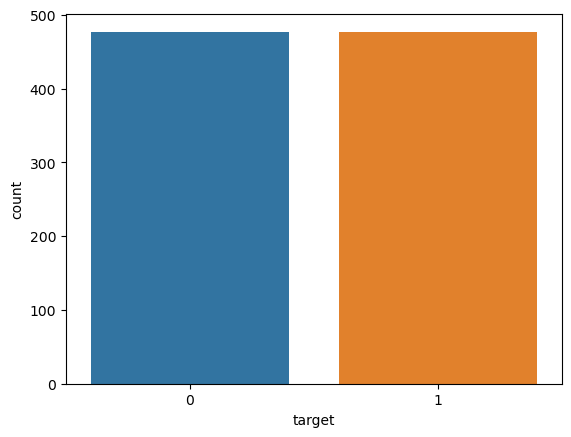

In [43]:
# count plot to make sure the dataset is balanced

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(final_heart_data['target'])
 
# Show the plot
plt.show()

### Detecting Correleation among attributes

<AxesSubplot:>

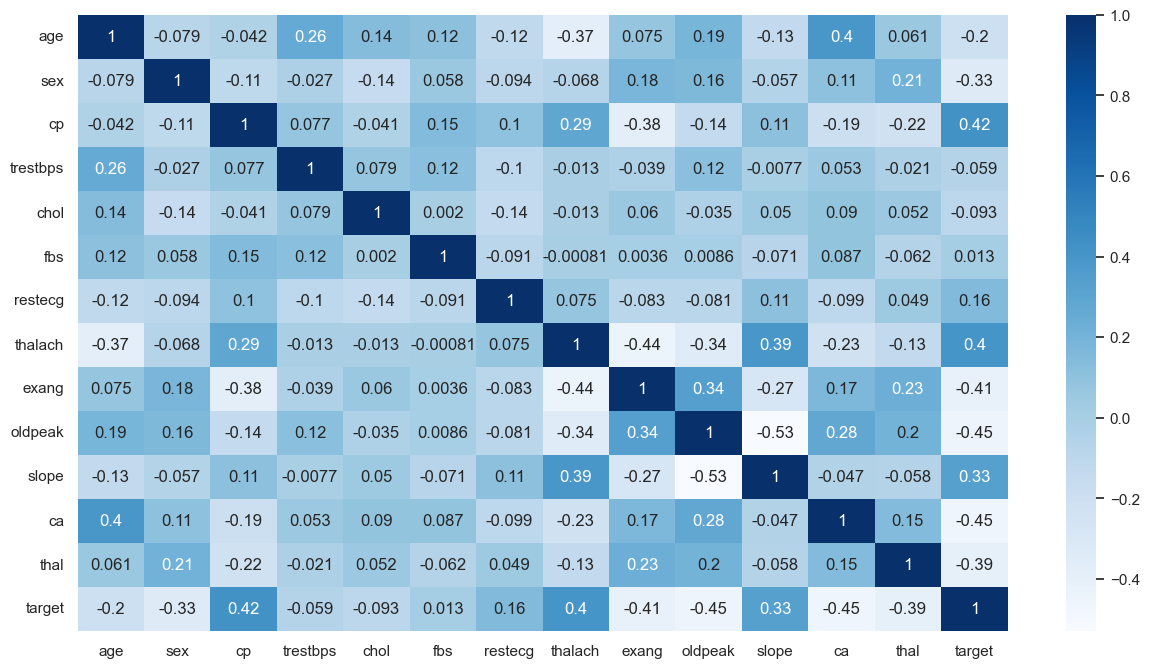

In [44]:
#Applying heatmap to find the correlation
sns.set (rc = {'figure.figsize':(15, 8)})
sns.heatmap(final_heart_data.corr(),cmap="Blues",annot=True)

### Plotting KDE Plot

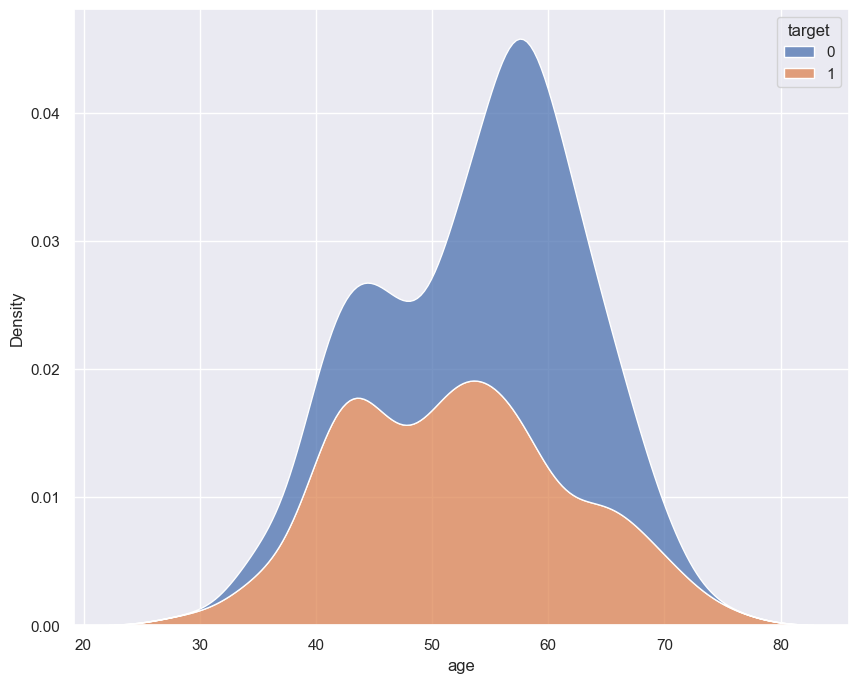

In [45]:
# KDE plot for both diseased and non-diseased individuals according to age distribution.
sns.set (rc = {'figure.figsize':(10, 8)})
sns.kdeplot(data=final_heart_data, x=final_heart_data['age'], hue=final_heart_data['target'], multiple='stack')
plt.show()

# ML Algorithms Implementation

Once the Pre-Processing of Data has been completed, we can use the pre-processed dataset for further implementation of the Machine Learning Algorithms

## AdaBoostM1 

In [46]:
# Splitting the dataset into X and Y

X=final_heart_data.drop("target",axis=1)
Y=final_heart_data["target"]

In [47]:
auc_roc_scores=[]
auc_prc_scores=[]

In [48]:
#Importing Necessary Packages Required

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,matthews_corrcoef,roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import auc, precision_recall_curve,average_precision_score
from sklearn.ensemble import AdaBoostClassifier

In [49]:
#Applying GridSearchCV to find out the best parameters

from sklearn.model_selection import GridSearchCV
n_estimators = list(range(100,1000,100))
grid={"n_estimators":n_estimators,'learning_rate':[1.0]}
ab_classifier=AdaBoostClassifier() #Creating AdaBoostClassifer classifier
ab_classifier_cv=GridSearchCV(ab_classifier,grid,cv=10)  
ab_classifier_cv.fit(X,Y) # fitting the model for grid search

print("tuned hpyerparameters :(best parameters) ",ab_classifier_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 1.0, 'n_estimators': 700}


In [50]:
#The parameters are set based on the value obtained from GridSearchCV method

ab_classifier=AdaBoostClassifier(n_estimators=700,learning_rate=1.0)

In [51]:
#Applying 10-fold cross validation

k = 10 #Setting k value as 10

k_fold = KFold(n_splits = k, random_state = None,shuffle=True)  
   
    

#Initializing lists to store the values of each fold
acc_scores = []  
rs_scores = []
ps_scores = []
sensitivity_scores = []
specificity_scores=[]
kappa_scores=[]
mcc_scores=[]
f1_scores=[]
auroc_scores=[]
auprc_scores=[]

  
# Looping over each split to get the accuracy score of each split  
for training_index, testing_index in k_fold.split(X):  
    X_train, X_test = X.iloc[training_index,:], X.iloc[testing_index,:]  
    Y_train, Y_test = Y.iloc[training_index] , Y.iloc[testing_index]  
      
    # Fitting training data to the model  
    ab_classifier.fit(X_train,Y_train)  
    
    # Predicting values for the testing dataset  
    Y_pred = ab_classifier.predict(X_test)  
    
    
    #Creating Confusion Matrix to find the TP,TN,FP,FN values 
    
    conf_matrix=confusion_matrix(Y_test,Y_pred)
    
      
    # Calculating accuracy and other metrics   
    
    acc = accuracy_score(Y_test , Y_pred)  
    rs = recall_score(Y_test,Y_pred)
    pc = precision_score(Y_test,Y_pred)
    f1s = f1_score(Y_test,Y_pred)
    cks = cohen_kappa_score(Y_test,Y_pred)
    mcc = matthews_corrcoef(Y_test,Y_pred)
    auroc = roc_auc_score(Y_test, Y_pred)
    auprc = average_precision_score(Y_test, Y_pred)

    #Extracting TP,TN,FP,FN values from the confusion matrix
    
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    #Calculating sensitivity and speceficity
    
    sensitivity = (TP / float(TP + FN))
    specificity = (TN / float(TN + FP))
    
    
    #Appending the values of each fold to the list created earlier
    
    acc_scores.append(acc) 
    rs_scores.append(rs) 
    ps_scores.append(pc) 
    f1_scores.append(f1s)
    auroc_scores.append(auroc)
    auprc_scores.append(auprc)
    mcc_scores.append(mcc) 
    kappa_scores.append(cks) 
    sensitivity_scores.append(sensitivity) 
    specificity_scores.append(specificity) 
      

# Calculating mean value of all the metrics from their respective lists  

mean_acc_score = sum(acc_scores) / k  
mean_rs_score = sum(rs_scores) / k  
mean_ps_score = sum(ps_scores) / k  
mean_f1_score = sum(f1_scores) / k  
mean_mcc_score = sum(mcc_scores) / k
mean_auroc_score = sum(auroc_scores) / k
mean_auprc_score = sum(auprc_scores) / k
mean_kappa_score = sum(kappa_scores) / k  
mean_sensitivity_score = sum(sensitivity_scores) / k  
mean_specificity_score = sum(specificity_scores) / k  


#Rounding off the values

mean_acc_score = (round(mean_acc_score, 5))*100  
mean_rs_score = round(mean_rs_score, 3) 
mean_ps_score = round(mean_ps_score, 3)   
mean_f1_score = round(mean_f1_score, 3) 
mean_mcc_score = round(mean_mcc_score, 3)  
mean_kappa_score = round(mean_kappa_score, 3)  
mean_sensitivity_score = round(mean_sensitivity_score, 3)   
mean_specificity_score = round(mean_specificity_score, 3) 
mean_auroc_score = round(mean_auroc_score, 3) 
mean_auprc_score = round(mean_auprc_score, 3) 

#Printing all the metrics
   
#print("Accuracy score of each fold: ", acc_scores)  
print("Mean accuracy score: ", mean_acc_score)  
#print("Recall score of each fold: ", rs_scores)  
print("Mean recall score: ", mean_rs_score)  
#print("Precison score of each fold: ", ps_scores)  
print("Mean Precison score: ", mean_ps_score)  
#print("F1-score of each fold: ", f1_scores)  
print("Mean F1-score score: ", mean_f1_score)  
#print("MCC score of each fold: ", mcc_scores)  
print("Mean MCC score: ", mean_mcc_score)  
#print("kappa score of each fold: ", kappa_scores)  
print("Mean kappa score: ", mean_kappa_score)  
#print("sensitivity score of each fold: ", sensitivity_scores)  
print("Mean sensitivity score: ", mean_sensitivity_score)  
#print("speceficity score of each fold: ", speceficity_scores)  
print("Mean speceficity score: ", mean_specificity_score)  
#print("AUROC score of each fold: ", auroc_scores)  
print("Mean AUROC value: ", mean_auroc_score)  
#print("AUPRC score of each fold: ", auprc_scores)  
print("Mean AUPRC value: ", mean_auprc_score)  

Mean accuracy score:  99.792
Mean recall score:  1.0
Mean Precison score:  0.996
Mean F1-score score:  0.998
Mean MCC score:  0.996
Mean kappa score:  0.996
Mean sensitivity score:  1.0
Mean speceficity score:  0.996
Mean AUROC value:  0.998
Mean AUPRC value:  0.996


In [52]:
auc_roc_scores.append(mean_auroc_score)
auc_prc_scores.append(mean_auprc_score)

### Displaying the Outputs in the form of a table

In [53]:
from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
metric_table = PrettyTable(["Model Name", "Accuracy", "Recall", "Precision",'F1-score','MCC-Score','kappa-score','sensitivity','specificity','AUROC','AUPRC'])
 
# Add rows
metric_table.add_row(["AdaBoostM1", mean_acc_score,mean_rs_score,mean_ps_score,mean_f1_score,mean_mcc_score,mean_kappa_score,mean_sensitivity_score,mean_specificity_score,mean_auroc_score,mean_auprc_score])
 
print(metric_table)

+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+
| Model Name | Accuracy | Recall | Precision | F1-score | MCC-Score | kappa-score | sensitivity | specificity | AUROC | AUPRC |
+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+
| AdaBoostM1 |  99.792  |  1.0   |   0.996   |  0.998   |   0.996   |    0.996    |     1.0     |    0.996    | 0.998 | 0.996 |
+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+


## K-Nearest Neighbors

In [54]:
# Splitting the dataset into X and Y

X=final_heart_data.drop("target",axis=1)
Y=final_heart_data["target"]

In [55]:
#Importing Necessary Packages Required

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,matthews_corrcoef,roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import auc, precision_recall_curve,average_precision_score
from sklearn.neighbors import KNeighborsClassifier

In [56]:
#Applying GridSearchCV to find out the best parameters

from sklearn.model_selection import GridSearchCV

knn_classifier = KNeighborsClassifier()

k_range = list(range(1, 31))

param_grid = [
    {'n_neighbors':k_range,
    'metric':['minkowski'],
     'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p':[1,2]}
]

# defining parameter range
knn_grid = GridSearchCV(knn_classifier, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
knn_grid_search=knn_grid.fit(X,Y)

print("tuned hpyerparameters :(best parameters) ",knn_grid_search.best_params_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1}


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [57]:
#The parameters are set based on the value obtained from GridSearchCV method

knn_classifier = KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=1,algorithm='auto')

In [58]:
#Applying 10-fold cross validation

k = 10 #Setting k value as 10

k_fold = KFold(n_splits = k, random_state = None,shuffle=True)  
   
    

#Initializing lists to store the values of each fold
acc_scores = []  
rs_scores = []
ps_scores = []
sensitivity_scores = []
specificity_scores=[]
kappa_scores=[]
mcc_scores=[]
f1_scores=[]
auroc_scores=[]
auprc_scores=[]

  
# Looping over each split to get the accuracy score of each split  
for training_index, testing_index in k_fold.split(X):  
    X_train, X_test = X.iloc[training_index,:], X.iloc[testing_index,:]  
    Y_train, Y_test = Y.iloc[training_index] , Y.iloc[testing_index]  
      
    # Fitting training data to the model  
    knn_classifier.fit(X_train,Y_train)  
    
    # Predicting values for the testing dataset  
    Y_pred = knn_classifier.predict(X_test)  
    
    
    #Creating Confusion Matrix to find the TP,TN,FP,FN values 
    
    conf_matrix=confusion_matrix(Y_test,Y_pred)
    
      
    # Calculating accuracy and other metrics   
    
    acc = accuracy_score(Y_test , Y_pred)  
    rs = recall_score(Y_test,Y_pred)
    pc = precision_score(Y_test,Y_pred)
    f1s = f1_score(Y_test,Y_pred)
    cks = cohen_kappa_score(Y_test,Y_pred)
    mcc = matthews_corrcoef(Y_test,Y_pred)
    auroc = roc_auc_score(Y_test, Y_pred)
    auprc = average_precision_score(Y_test, Y_pred)

    #Extracting TP,TN,FP,FN values from the confusion matrix
    
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    #Calculating sensitivity and speceficity
    
    sensitivity = (TP / float(TP + FN))
    specificity = (TN / float(TN + FP))
    
    
    #Appending the values of each fold to the list created earlier
    
    acc_scores.append(acc) 
    rs_scores.append(rs) 
    ps_scores.append(pc) 
    f1_scores.append(f1s)
    auroc_scores.append(auroc)
    auprc_scores.append(auprc)
    mcc_scores.append(mcc) 
    kappa_scores.append(cks) 
    sensitivity_scores.append(sensitivity) 
    specificity_scores.append(specificity) 
      

# Calculating mean value of all the metrics from their respective lists  

mean_acc_score = sum(acc_scores) / k  
mean_rs_score = sum(rs_scores) / k  
mean_ps_score = sum(ps_scores) / k  
mean_f1_score = sum(f1_scores) / k  
mean_mcc_score = sum(mcc_scores) / k
mean_auroc_score = sum(auroc_scores) / k
mean_auprc_score = sum(auprc_scores) / k
mean_kappa_score = sum(kappa_scores) / k  
mean_sensitivity_score = sum(sensitivity_scores) / k  
mean_specificity_score = sum(specificity_scores) / k  


#Rounding off the values

mean_acc_score = (round(mean_acc_score, 5))*100  
mean_rs_score = round(mean_rs_score, 3) 
mean_ps_score = round(mean_ps_score, 3)   
mean_f1_score = round(mean_f1_score, 3) 
mean_mcc_score = round(mean_mcc_score, 3)  
mean_kappa_score = round(mean_kappa_score, 3)  
mean_sensitivity_score = round(mean_sensitivity_score, 3)   
mean_specificity_score = round(mean_specificity_score, 3) 
mean_auroc_score = round(mean_auroc_score, 3) 
mean_auprc_score = round(mean_auprc_score, 3) 

#Printing all the metrics
   
#print("Accuracy score of each fold: ", acc_scores)  
print("Mean accuracy score: ", mean_acc_score)  
#print("Recall score of each fold: ", rs_scores)  
print("Mean recall score: ", mean_rs_score)  
#print("Precison score of each fold: ", ps_scores)  
print("Mean Precison score: ", mean_ps_score)  
#print("F1-score of each fold: ", f1_scores)  
print("Mean F1-score score: ", mean_f1_score)  
#print("MCC score of each fold: ", mcc_scores)  
print("Mean MCC score: ", mean_mcc_score)  
#print("kappa score of each fold: ", kappa_scores)  
print("Mean kappa score: ", mean_kappa_score)  
#print("sensitivity score of each fold: ", sensitivity_scores)  
print("Mean sensitivity score: ", mean_sensitivity_score)  
#print("speceficity score of each fold: ", speceficity_scores)  
print("Mean specificity score: ", mean_specificity_score)  
#print("AUROC score of each fold: ", auroc_scores)  
print("Mean AUROC value: ", mean_auroc_score)  
#print("AUPRC score of each fold: ", auprc_scores)  
print("Mean AUPRC value: ", mean_auprc_score)  

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Mean accuracy score:  100.0
Mean recall score:  1.0
Mean Precison score:  1.0
Mean F1-score score:  1.0
Mean MCC score:  1.0
Mean kappa score:  1.0
Mean sensitivity score:  1.0
Mean specificity score:  1.0
Mean AUROC value:  1.0
Mean AUPRC value:  1.0


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [59]:
auc_roc_scores.append(mean_auroc_score)
auc_prc_scores.append(mean_auprc_score)

### Displaying the Outputs in the form of a table

In [60]:
from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
metric_table = PrettyTable(["Model Name", "Accuracy", "Recall", "Precision",'F1-score','MCC-Score','kappa-score','sensitivity','specificity','AUROC','AUPRC'])
 
# Add rows
metric_table.add_row(["KNN", mean_acc_score,mean_rs_score,mean_ps_score,mean_f1_score,mean_mcc_score,mean_kappa_score,mean_sensitivity_score,mean_specificity_score,mean_auroc_score,mean_auprc_score])
 
print(metric_table)

+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+
| Model Name | Accuracy | Recall | Precision | F1-score | MCC-Score | kappa-score | sensitivity | specificity | AUROC | AUPRC |
+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+
|    KNN     |  100.0   |  1.0   |    1.0    |   1.0    |    1.0    |     1.0     |     1.0     |     1.0     |  1.0  |  1.0  |
+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+


## Logistic Regression

In [61]:
# Splitting the dataset into X and Y

X=final_heart_data.drop("target",axis=1)
Y=final_heart_data["target"]

In [62]:
#Importing Necessary Packages Required

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,matthews_corrcoef,roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import auc, precision_recall_curve,average_precision_score
from sklearn.linear_model import LogisticRegression

In [63]:
#Applying GridSearchCV to find out the best parameters

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"penalty":["l1","l2"],"max_iter":[100,200,300,400,500],"solver":['newton-cg', 'lbfgs', 'liblinear', 'saag', 'saga']}
lr_classifier=LogisticRegression()
lr_grid=GridSearchCV(lr_classifier,grid,cv=10)
lr_grid_search=lr_grid.fit(X,Y)

print("tuned hpyerparameters :(best parameters) ",lr_grid_search.best_params_)


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anacond

tuned hpyerparameters :(best parameters)  {'max_iter': 400, 'penalty': 'l2', 'solver': 'lbfgs'}


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
#The parameters are set based on the value obtained from GridSearchCV method
lr_classifier=LogisticRegression(C=1.0, penalty = 'l2',max_iter=400,solver='lbfgs')

In [65]:
#Applying 10-fold cross validation

k = 10 #Setting k value as 10

k_fold = KFold(n_splits = k, random_state = None,shuffle=True)  
   
    

#Initializing lists to store the values of each fold
acc_scores = []  
rs_scores = []
ps_scores = []
sensitivity_scores = []
specificity_scores=[]
kappa_scores=[]
mcc_scores=[]
f1_scores=[]
auroc_scores=[]
auprc_scores=[]

  
# Looping over each split to get the accuracy score of each split  
for training_index, testing_index in k_fold.split(X):  
    X_train, X_test = X.iloc[training_index,:], X.iloc[testing_index,:]  
    Y_train, Y_test = Y.iloc[training_index] , Y.iloc[testing_index]  
    
    #ss=StandardScaler()
    #X_train = ss.fit_transform(X_train)
    #X_test = ss.transform(X_test)
    # Fitting training data to the model  
    lr_classifier.fit(X_train,Y_train)
    
    # Predicting values for the testing dataset  
    Y_pred = lr_classifier.predict(X_test)
    
    
    #Creating Confusion Matrix to find the TP,TN,FP,FN values 
    
    conf_matrix=confusion_matrix(Y_test,Y_pred)
    
      
    # Calculating accuracy and other metrics   
    
    acc = accuracy_score(Y_test , Y_pred)  
    rs = recall_score(Y_test,Y_pred)
    pc = precision_score(Y_test,Y_pred)
    f1s = f1_score(Y_test,Y_pred)
    cks = cohen_kappa_score(Y_test,Y_pred)
    mcc = matthews_corrcoef(Y_test,Y_pred)
    auroc = roc_auc_score(Y_test, Y_pred)
    auprc = average_precision_score(Y_test, Y_pred)

    #Extracting TP,TN,FP,FN values from the confusion matrix
    
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    #Calculating sensitivity and speceficity
    
    sensitivity = (TP / float(TP + FN))
    specificity = (TN / float(TN + FP))
    
    
    #Appending the values of each fold to the list created earlier
    
    acc_scores.append(acc) 
    rs_scores.append(rs) 
    ps_scores.append(pc) 
    f1_scores.append(f1s)
    auroc_scores.append(auroc)
    auprc_scores.append(auprc)
    mcc_scores.append(mcc) 
    kappa_scores.append(cks) 
    sensitivity_scores.append(sensitivity) 
    specificity_scores.append(specificity) 
      

# Calculating mean value of all the metrics from their respective lists  

mean_acc_score = sum(acc_scores) / k  
mean_rs_score = sum(rs_scores) / k  
mean_ps_score = sum(ps_scores) / k  
mean_f1_score = sum(f1_scores) / k  
mean_mcc_score = sum(mcc_scores) / k
mean_auroc_score = sum(auroc_scores) / k
mean_auprc_score = sum(auprc_scores) / k
mean_kappa_score = sum(kappa_scores) / k  
mean_sensitivity_score = sum(sensitivity_scores) / k  
mean_specificity_score = sum(specificity_scores) / k  


#Rounding off the values

mean_acc_score = (round(mean_acc_score, 5))*100  
mean_rs_score = round(mean_rs_score, 3) 
mean_ps_score = round(mean_ps_score, 3)   
mean_f1_score = round(mean_f1_score, 3) 
mean_mcc_score = round(mean_mcc_score, 3)  
mean_kappa_score = round(mean_kappa_score, 3)  
mean_sensitivity_score = round(mean_sensitivity_score, 3)   
mean_specificity_score = round(mean_specificity_score, 3) 
mean_auroc_score = round(mean_auroc_score, 3) 
mean_auprc_score = round(mean_auprc_score, 3) 

#Printing all the metrics
   
#print("Accuracy score of each fold: ", acc_scores)  
print("Mean accuracy score: ", mean_acc_score)  
#print("Recall score of each fold: ", rs_scores)  
print("Mean recall score: ", mean_rs_score)  
#print("Precison score of each fold: ", ps_scores)  
print("Mean Precison score: ", mean_ps_score)  
#print("F1-score of each fold: ", f1_scores)  
print("Mean F1-score score: ", mean_f1_score)  
#print("MCC score of each fold: ", mcc_scores)  
print("Mean MCC score: ", mean_mcc_score)  
#print("kappa score of each fold: ", kappa_scores)  
print("Mean kappa score: ", mean_kappa_score)  
#print("sensitivity score of each fold: ", sensitivity_scores)  
print("Mean sensitivity score: ", mean_sensitivity_score)  
#print("speceficity score of each fold: ", speceficity_scores)  
print("Mean specificity score: ", mean_specificity_score)  
#print("AUROC score of each fold: ", auroc_scores)  
print("Mean AUROC value: ", mean_auroc_score)  
#print("AUPRC score of each fold: ", auprc_scores)  
print("Mean AUPRC value: ", mean_auprc_score)  

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Mean accuracy score:  86.271
Mean recall score:  0.902
Mean Precison score:  0.839
Mean F1-score score:  0.868
Mean MCC score:  0.726
Mean kappa score:  0.72
Mean sensitivity score:  0.902
Mean specificity score:  0.82
Mean AUROC value:  0.861
Mean AUPRC value:  0.807


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
auc_roc_scores.append(mean_auroc_score)
auc_prc_scores.append(mean_auprc_score)

### Displaying the Outputs in the form of a table

In [67]:
from prettytable import PrettyTable
 
#Specify the Column Names while initializing the Table
metric_table = PrettyTable(["Model Name", "Accuracy", "Recall", "Precision",'F1-score','MCC-Score','kappa-score','sensitivity','specificity','AUROC','AUPRC'])
 
# Add rows
metric_table.add_row(["LR", mean_acc_score,mean_rs_score,mean_ps_score,mean_f1_score,mean_mcc_score,mean_kappa_score,mean_sensitivity_score,mean_specificity_score,mean_auroc_score,mean_auprc_score])
 
print(metric_table)

+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+
| Model Name | Accuracy | Recall | Precision | F1-score | MCC-Score | kappa-score | sensitivity | specificity | AUROC | AUPRC |
+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+
|     LR     |  86.271  | 0.902  |   0.839   |  0.868   |   0.726   |     0.72    |    0.902    |     0.82    | 0.861 | 0.807 |
+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+


## Decison Tree

In [68]:
# Splitting the dataset into X and Y

X=final_heart_data.drop("target",axis=1)
Y=final_heart_data["target"]

In [69]:
#Importing Necessary Packages Required

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,matthews_corrcoef,roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import auc, precision_recall_curve,average_precision_score
from sklearn.tree import DecisionTreeClassifier

In [70]:
#Applying GridSearchCV to find out the best parameters

from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier()

maxd_range = list(range(1, 31))
min_sample_split=list(range(1,10))

param_grid = [
    {'max_depth': maxd_range,
    'criterion': ["gini", "entropy"],
    'min_samples_split':min_sample_split,
    'max_features': ['auto', 'sqrt', 'log2']}
]

# defining parameter range
dt_grid = GridSearchCV(dt_classifier, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
dt_grid_search=dt_grid.fit(X,Y)

print("tuned hpyerparameters :(best parameters) ",dt_grid_search.best_params_)

Fitting 10 folds for each of 1620 candidates, totalling 16200 fits
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2}


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1800 fits failed out of a total of 16200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn(s

In [71]:
#The parameters are set based on the value obtained from GridSearchCV method

dt_classifier = DecisionTreeClassifier(criterion= 'gini', max_depth= 20,max_features='sqrt',min_samples_split=2)

In [78]:
#Applying 10-fold cross validation
k = 10 #Setting k value as 10

k_fold = KFold(n_splits = k, random_state = None,shuffle=True)  
   
    

#Initializing lists to store the values of each fold
acc_scores = []  
rs_scores = []
ps_scores = []
sensitivity_scores = []
specificity_scores=[]
kappa_scores=[]
mcc_scores=[]
f1_scores=[]
auroc_scores=[]
auprc_scores=[]

  
# Looping over each split to get the accuracy score of each split  
for training_index, testing_index in k_fold.split(X):  
    X_train, X_test = X.iloc[training_index,:], X.iloc[testing_index,:]  
    Y_train, Y_test = Y.iloc[training_index] , Y.iloc[testing_index]  
    
    # Fitting training data to the model  
    dt_classifier.fit(X_train,Y_train)
    
    # Predicting values for the testing dataset  
    Y_pred = dt_classifier.predict(X_test)
    
    
    #Creating Confusion Matrix to find the TP,TN,FP,FN values 
    
    conf_matrix=confusion_matrix(Y_test,Y_pred)
    
      
    # Calculating accuracy and other metrics   
    
    acc = accuracy_score(Y_test , Y_pred)  
    rs = recall_score(Y_test,Y_pred)
    pc = precision_score(Y_test,Y_pred)
    f1s = f1_score(Y_test,Y_pred)
    cks = cohen_kappa_score(Y_test,Y_pred)
    mcc = matthews_corrcoef(Y_test,Y_pred)
    auroc = roc_auc_score(Y_test, Y_pred)
    auprc = average_precision_score(Y_test, Y_pred)

    #Extracting TP,TN,FP,FN values from the confusion matrix
    
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    #Calculating sensitivity and speceficity
    
    sensitivity = (TP / float(TP + FN))
    specificity = (TN / float(TN + FP))
    
    
    #Appending the values of each fold to the list created earlier
    
    acc_scores.append(acc) 
    rs_scores.append(rs) 
    ps_scores.append(pc) 
    f1_scores.append(f1s)
    auroc_scores.append(auroc)
    auprc_scores.append(auprc)
    mcc_scores.append(mcc) 
    kappa_scores.append(cks) 
    sensitivity_scores.append(sensitivity) 
    specificity_scores.append(specificity) 
      

# Calculating mean value of all the metrics from their respective lists  

mean_acc_score = sum(acc_scores) / k  
mean_rs_score = sum(rs_scores) / k  
mean_ps_score = sum(ps_scores) / k  
mean_f1_score = sum(f1_scores) / k  
mean_mcc_score = sum(mcc_scores) / k
mean_auroc_score = sum(auroc_scores) / k
mean_auprc_score = sum(auprc_scores) / k
mean_kappa_score = sum(kappa_scores) / k  
mean_sensitivity_score = sum(sensitivity_scores) / k  
mean_specificity_score = sum(specificity_scores) / k  


#Rounding off the values

mean_acc_score = (round(mean_acc_score, 5))*100  
mean_rs_score = round(mean_rs_score, 3) 
mean_ps_score = round(mean_ps_score, 3)   
mean_f1_score = round(mean_f1_score, 3) 
mean_mcc_score = round(mean_mcc_score, 3)  
mean_kappa_score = round(mean_kappa_score, 3)  
mean_sensitivity_score = round(mean_sensitivity_score, 3)   
mean_specificity_score = round(mean_specificity_score, 3) 
mean_auroc_score = round(mean_auroc_score, 3) 
mean_auprc_score = round(mean_auprc_score, 3) 

#Printing all the metrics
   
print("Accuracy score of each fold: ", acc_scores)  
print("Mean accuracy score: ", mean_acc_score)  
#print("Recall score of each fold: ", rs_scores)  
print("Mean recall score: ", mean_rs_score)  
#print("Precison score of each fold: ", ps_scores)  
print("Mean Precison score: ", mean_ps_score)  
#print("F1-score of each fold: ", f1_scores)  
print("Mean F1-score score: ", mean_f1_score)  
#print("MCC score of each fold: ", mcc_scores)  
print("Mean MCC score: ", mean_mcc_score)  
#print("kappa score of each fold: ", kappa_scores)  
print("Mean kappa score: ", mean_kappa_score)  
#print("sensitivity score of each fold: ", sensitivity_scores)  
print("Mean sensitivity score: ", mean_sensitivity_score)  
#print("speceficity score of each fold: ", speceficity_scores)  
print("Mean specificity score: ", mean_specificity_score)  
#print("AUROC score of each fold: ", auroc_scores)  
print("Mean AUROC value: ", mean_auroc_score)  
#print("AUPRC score of each fold: ", auprc_scores)  
print("Mean AUPRC value: ", mean_auprc_score)  

Accuracy score of each fold:  [0.9895833333333334, 1.0, 0.9791666666666666, 1.0, 0.9894736842105263, 1.0, 1.0, 1.0, 0.9789473684210527, 1.0]
Mean accuracy score:  99.372
Mean recall score:  1.0
Mean Precison score:  0.988
Mean F1-score score:  0.994
Mean MCC score:  0.988
Mean kappa score:  0.987
Mean sensitivity score:  1.0
Mean specificity score:  0.987
Mean AUROC value:  0.993
Mean AUPRC value:  0.988


In [79]:
auc_roc_scores.append(mean_auroc_score)
auc_prc_scores.append(mean_auprc_score)

### Displaying the Outputs in the form of a table

In [80]:
from prettytable import PrettyTable
 
#Specify the Column Names while initializing the Table
metric_table = PrettyTable(["Model Name", "Accuracy", "Recall", "Precision",'F1-score','MCC-Score','kappa-score','sensitivity','specificity','AUROC','AUPRC'])
 
# Add rows
metric_table.add_row(["DT", round(mean_acc_score,3),mean_rs_score,mean_ps_score,mean_f1_score,mean_mcc_score,mean_kappa_score,mean_sensitivity_score,mean_specificity_score,mean_auroc_score,mean_auprc_score])
 
print(metric_table)

+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+
| Model Name | Accuracy | Recall | Precision | F1-score | MCC-Score | kappa-score | sensitivity | specificity | AUROC | AUPRC |
+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+
|     DT     |  99.372  |  1.0   |   0.988   |  0.994   |   0.988   |    0.987    |     1.0     |    0.987    | 0.993 | 0.988 |
+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+


## Random Forest

In [81]:
#Importing Necessary Packages Required

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,matthews_corrcoef,roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import auc, precision_recall_curve,average_precision_score
from sklearn.ensemble import RandomForestClassifier

In [82]:
#Applying GridSearchCV to find out the best parameters

from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier()

n_estimator= list(range(100,1000,100))
param_grid = [
    {
         'n_estimators':n_estimator,
         'max_features': ['sqrt'],
        'criterion':['gini'],
        'max_depth':[20],
        'min_samples_split':[2]
    }
]

# defining parameter range
rf_grid = GridSearchCV(rf_classifier, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
rf_grid_search=rf_grid.fit(X,Y)

print("tuned hpyerparameters :(best parameters) ",rf_grid_search.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}


In [84]:
#The parameters are set based on the value obtained from GridSearchCV method

rf_classifier = RandomForestClassifier(n_estimators=300,min_samples_split=2,max_features='sqrt',criterion= 'gini', max_depth= 20)

In [85]:
#Applying 10-fold cross validation
k = 10 #Setting k value as 10

k_fold = KFold(n_splits = k, random_state = None,shuffle=True)  
   
    

#Initializing lists to store the values of each fold
acc_scores = []  
rs_scores = []
ps_scores = []
sensitivity_scores = []
specificity_scores=[]
kappa_scores=[]
mcc_scores=[]
f1_scores=[]
auroc_scores=[]
auprc_scores=[]

  
# Looping over each split to get the accuracy score of each split  
for training_index, testing_index in k_fold.split(X):  
    X_train, X_test = X.iloc[training_index,:], X.iloc[testing_index,:]  
    Y_train, Y_test = Y.iloc[training_index] , Y.iloc[testing_index]  
    
    # Fitting training data to the model  
    rf_classifier.fit(X_train,Y_train)
    
    # Predicting values for the testing dataset  
    Y_pred = rf_classifier.predict(X_test)
    
    
    #Creating Confusion Matrix to find the TP,TN,FP,FN values 
    
    conf_matrix=confusion_matrix(Y_test,Y_pred)
    
      
    # Calculating accuracy and other metrics   
    
    acc = accuracy_score(Y_test , Y_pred)  
    rs = recall_score(Y_test,Y_pred)
    pc = precision_score(Y_test,Y_pred)
    f1s = f1_score(Y_test,Y_pred)
    cks = cohen_kappa_score(Y_test,Y_pred)
    mcc = matthews_corrcoef(Y_test,Y_pred)
    auroc = roc_auc_score(Y_test, Y_pred)
    auprc = average_precision_score(Y_test, Y_pred)

    #Extracting TP,TN,FP,FN values from the confusion matrix
    
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    #Calculating sensitivity and speceficity
    
    sensitivity = (TP / float(TP + FN))
    specificity = (TN / float(TN + FP))
    
    
    #Appending the values of each fold to the list created earlier
    
    acc_scores.append(acc) 
    rs_scores.append(rs) 
    ps_scores.append(pc) 
    f1_scores.append(f1s)
    auroc_scores.append(auroc)
    auprc_scores.append(auprc)
    mcc_scores.append(mcc) 
    kappa_scores.append(cks) 
    sensitivity_scores.append(sensitivity) 
    specificity_scores.append(specificity) 
      

# Calculating mean value of all the metrics from their respective lists  

mean_acc_score = sum(acc_scores) / k  
mean_rs_score = sum(rs_scores) / k  
mean_ps_score = sum(ps_scores) / k  
mean_f1_score = sum(f1_scores) / k  
mean_mcc_score = sum(mcc_scores) / k
mean_auroc_score = sum(auroc_scores) / k
mean_auprc_score = sum(auprc_scores) / k
mean_kappa_score = sum(kappa_scores) / k  
mean_sensitivity_score = sum(sensitivity_scores) / k  
mean_specificity_score = sum(specificity_scores) / k  


#Rounding off the values

mean_acc_score = (round(mean_acc_score, 5))*100  
mean_rs_score = round(mean_rs_score, 3) 
mean_ps_score = round(mean_ps_score, 3)   
mean_f1_score = round(mean_f1_score, 3) 
mean_mcc_score = round(mean_mcc_score, 3)  
mean_kappa_score = round(mean_kappa_score, 3)  
mean_sensitivity_score = round(mean_sensitivity_score, 3)   
mean_specificity_score = round(mean_specificity_score, 3) 
mean_auroc_score = round(mean_auroc_score, 3) 
mean_auprc_score = round(mean_auprc_score, 3) 

#Printing all the metrics
   
print("Accuracy score of each fold: ", acc_scores)  
print("Mean accuracy score: ", mean_acc_score)  
#print("Recall score of each fold: ", rs_scores)  
print("Mean recall score: ", mean_rs_score)  
#print("Precison score of each fold: ", ps_scores)  
print("Mean Precison score: ", mean_ps_score)  
#print("F1-score of each fold: ", f1_scores)  
print("Mean F1-score score: ", mean_f1_score)  
#print("MCC score of each fold: ", mcc_scores)  
print("Mean MCC score: ", mean_mcc_score)  
#print("kappa score of each fold: ", kappa_scores)  
print("Mean kappa score: ", mean_kappa_score)  
#print("sensitivity score of each fold: ", sensitivity_scores)  
print("Mean sensitivity score: ", mean_sensitivity_score)  
#print("speceficity score of each fold: ", speceficity_scores)  
print("Mean specificity score: ", mean_specificity_score)  
#print("AUROC score of each fold: ", auroc_scores)  
print("Mean AUROC value: ", mean_auroc_score)  
#print("AUPRC score of each fold: ", auprc_scores)  
print("Mean AUPRC value: ", mean_auprc_score)  

Accuracy score of each fold:  [1.0, 0.9895833333333334, 0.9895833333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9894736842105263, 0.9894736842105263]
Mean accuracy score:  99.581
Mean recall score:  1.0
Mean Precison score:  0.992
Mean F1-score score:  0.996
Mean MCC score:  0.992
Mean kappa score:  0.991
Mean sensitivity score:  1.0
Mean specificity score:  0.992
Mean AUROC value:  0.996
Mean AUPRC value:  0.992


In [86]:
auc_roc_scores.append(mean_auroc_score)
auc_prc_scores.append(mean_auprc_score)

### Displaying the Outputs in the form of a table

In [87]:
from prettytable import PrettyTable
 
#Specify the Column Names while initializing the Table
metric_table = PrettyTable(["Model Name", "Accuracy", "Recall", "Precision",'F1-score','MCC-Score','kappa-score','sensitivity','specificity','AUROC','AUPRC'])
 
# Add rows
metric_table.add_row(["RF", round(mean_acc_score,3),mean_rs_score,mean_ps_score,mean_f1_score,mean_mcc_score,mean_kappa_score,mean_sensitivity_score,mean_specificity_score,mean_auroc_score,mean_auprc_score])
 
print(metric_table)

+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+
| Model Name | Accuracy | Recall | Precision | F1-score | MCC-Score | kappa-score | sensitivity | specificity | AUROC | AUPRC |
+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+
|     RF     |  99.581  |  1.0   |   0.992   |  0.996   |   0.992   |    0.991    |     1.0     |    0.992    | 0.996 | 0.992 |
+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+


## Multi Layer Perceptron

In [88]:
#Importing Necessary Packages Required

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,matthews_corrcoef,roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import auc, precision_recall_curve,average_precision_score
from sklearn.neural_network import MLPClassifier

In [89]:
#The parameters are set based on the value obtained from GridSearchCV method

mlp_classifier = MLPClassifier()

In [90]:
#Applying GridSearchCV to find out the best parameters

from sklearn.model_selection import GridSearchCV


param_grid = [
    {
    'hidden_layer_sizes': [(100,100),(100,150),(150,100),(150,150),(200,150),(150,200),(200,200)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant','adaptive']}
]

# defining parameter range
mlp_grid = GridSearchCV(mlp_classifier, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
mlp_grid_search=mlp_grid.fit(X,Y)

print("tuned hpyerparameters :(best parameters) ",mlp_grid_search.best_params_)
print("tuned hpyerparameters :(best parameters) ",mlp_grid_search.best_score_)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer

tuned hpyerparameters :(best parameters)  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 200), 'learning_rate': 'constant', 'solver': 'adam'}
tuned hpyerparameters :(best parameters)  0.9423464912280701


In [93]:
#Applying GridSearchCV to find out the best parameters

from sklearn.model_selection import GridSearchCV


param_grid = [
    {
    'max_iter':[100,200,300,400,500,600,700,800,900,1000],
    'hidden_layer_sizes': [(150,200)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant']}
]

# defining parameter range
mlp_grid = GridSearchCV(mlp_classifier, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
mlp_grid_search=mlp_grid.fit(X,Y)

print("tuned hpyerparameters :(best parameters) ",mlp_grid_search.best_params_)
print("tuned hpyerparameters :(best parameters) ",mlp_grid_search.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer

tuned hpyerparameters :(best parameters)  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 200), 'learning_rate': 'constant', 'max_iter': 800, 'solver': 'adam'}
tuned hpyerparameters :(best parameters)  0.9433991228070177


In [91]:
#The parameters are set based on the value obtained from GridSearchCV method

mlp_classifier = MLPClassifier(max_iter=800,activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (150, 200), learning_rate= 'constant', solver= 'adam')

In [95]:
#Applying 10-fold cross validation
k = 10 #Setting k value as 10

k_fold = KFold(n_splits = k, random_state = None,shuffle=True)  
   
    

#Initializing lists to store the values of each fold
acc_scores = []  
rs_scores = []
ps_scores = []
sensitivity_scores = []
specificity_scores=[]
kappa_scores=[]
mcc_scores=[]
f1_scores=[]
auroc_scores=[]
auprc_scores=[]

  
# Looping over each split to get the accuracy score of each split  
for training_index, testing_index in k_fold.split(X):  
    X_train, X_test = X.iloc[training_index,:], X.iloc[testing_index,:]  
    Y_train, Y_test = Y.iloc[training_index] , Y.iloc[testing_index]  
    
    # Fitting training data to the model  
    mlp_classifier.fit(X_train,Y_train)
    
    # Predicting values for the testing dataset  
    Y_pred = mlp_classifier.predict(X_test)
    
    
    #Creating Confusion Matrix to find the TP,TN,FP,FN values 
    
    conf_matrix=confusion_matrix(Y_test,Y_pred)
    
      
    # Calculating accuracy and other metrics   
    
    acc = accuracy_score(Y_test , Y_pred)  
    rs = recall_score(Y_test,Y_pred)
    pc = precision_score(Y_test,Y_pred)
    f1s = f1_score(Y_test,Y_pred)
    cks = cohen_kappa_score(Y_test,Y_pred)
    mcc = matthews_corrcoef(Y_test,Y_pred)
    auroc = roc_auc_score(Y_test, Y_pred)
    auprc = average_precision_score(Y_test, Y_pred)

    #Extracting TP,TN,FP,FN values from the confusion matrix
    
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    #Calculating sensitivity and speceficity
    
    sensitivity = (TP / float(TP + FN))
    specificity = (TN / float(TN + FP))
    
    
    #Appending the values of each fold to the list created earlier
    
    acc_scores.append(acc) 
    rs_scores.append(rs) 
    ps_scores.append(pc) 
    f1_scores.append(f1s)
    auroc_scores.append(auroc)
    auprc_scores.append(auprc)
    mcc_scores.append(mcc) 
    kappa_scores.append(cks) 
    sensitivity_scores.append(sensitivity) 
    specificity_scores.append(specificity) 
      

# Calculating mean value of all the metrics from their respective lists  

mean_acc_score = sum(acc_scores) / k  
mean_rs_score = sum(rs_scores) / k  
mean_ps_score = sum(ps_scores) / k  
mean_f1_score = sum(f1_scores) / k  
mean_mcc_score = sum(mcc_scores) / k
mean_auroc_score = sum(auroc_scores) / k
mean_auprc_score = sum(auprc_scores) / k
mean_kappa_score = sum(kappa_scores) / k  
mean_sensitivity_score = sum(sensitivity_scores) / k  
mean_specificity_score = sum(specificity_scores) / k  


#Rounding off the values

mean_acc_score = (round(mean_acc_score, 5))*100  
mean_rs_score = round(mean_rs_score, 3) 
mean_ps_score = round(mean_ps_score, 3)   
mean_f1_score = round(mean_f1_score, 3) 
mean_mcc_score = round(mean_mcc_score, 3)  
mean_kappa_score = round(mean_kappa_score, 3)  
mean_sensitivity_score = round(mean_sensitivity_score, 3)   
mean_specificity_score = round(mean_specificity_score, 3) 
mean_auroc_score = round(mean_auroc_score, 3) 
mean_auprc_score = round(mean_auprc_score, 3) 

#Printing all the metrics
   
print("Accuracy score of each fold: ", acc_scores)  
print("Mean accuracy score: ", mean_acc_score)  
#print("Recall score of each fold: ", rs_scores)  
print("Mean recall score: ", mean_rs_score)  
#print("Precison score of each fold: ", ps_scores)  
print("Mean Precison score: ", mean_ps_score)  
#print("F1-score of each fold: ", f1_scores)  
print("Mean F1-score score: ", mean_f1_score)  
#print("MCC score of each fold: ", mcc_scores)  
print("Mean MCC score: ", mean_mcc_score)  
#print("kappa score of each fold: ", kappa_scores)  
print("Mean kappa score: ", mean_kappa_score)  
#print("sensitivity score of each fold: ", sensitivity_scores)  
print("Mean sensitivity score: ", mean_sensitivity_score)  
#print("speceficity score of each fold: ", speceficity_scores)  
print("Mean specificity score: ", mean_specificity_score)  
#print("AUROC score of each fold: ", auroc_scores)  
print("Mean AUROC value: ", mean_auroc_score)  
#print("AUPRC score of each fold: ", auprc_scores)  
print("Mean AUPRC value: ", mean_auprc_score)  

Accuracy score of each fold:  [0.9583333333333334, 0.9791666666666666, 0.9166666666666666, 0.9791666666666666, 0.9368421052631579, 0.9157894736842105, 0.9578947368421052, 0.9894736842105263, 0.9263157894736842, 0.9578947368421052]
Mean accuracy score:  95.175
Mean recall score:  0.947
Mean Precison score:  0.958
Mean F1-score score:  0.952
Mean MCC score:  0.902
Mean kappa score:  0.899
Mean sensitivity score:  0.947
Mean specificity score:  0.945
Mean AUROC value:  0.946
Mean AUPRC value:  0.933


In [96]:
auc_roc_scores.append(mean_auroc_score)
auc_prc_scores.append(mean_auprc_score)

### Displaying the Outputs in the form of a table

In [97]:
from prettytable import PrettyTable
 
#Specify the Column Names while initializing the Table
metric_table = PrettyTable(["Model Name", "Accuracy", "Recall", "Precision",'F1-score','MCC-Score','kappa-score','sensitivity','specificity','AUROC','AUPRC'])
 
# Add rows
metric_table.add_row(["MLP", round(mean_acc_score,3),mean_rs_score,mean_ps_score,mean_f1_score,mean_mcc_score,mean_kappa_score,mean_sensitivity_score,mean_specificity_score,mean_auroc_score,mean_auprc_score])
 
print(metric_table)

+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+
| Model Name | Accuracy | Recall | Precision | F1-score | MCC-Score | kappa-score | sensitivity | specificity | AUROC | AUPRC |
+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+
|    MLP     |  95.175  | 0.947  |   0.958   |  0.952   |   0.902   |    0.899    |    0.947    |    0.945    | 0.946 | 0.933 |
+------------+----------+--------+-----------+----------+-----------+-------------+-------------+-------------+-------+-------+


# Feature Ranking

In [98]:
features=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


## AdaBoostM1

+--------------+--------------------+
| Feature Name | Co-effecient Score |
+--------------+--------------------+
|     age      |      0.14571       |
|     sex      |      0.01857       |
|      cp      |      0.02143       |
|   trestbps   |      0.12571       |
|     chol     |      0.21286       |
|     fbs      |      0.01143       |
|   restecg    |      0.00857       |
|   thalach    |        0.23        |
|    exang     |      0.00143       |
|   oldpeak    |      0.13857       |
|    slope     |      0.02143       |
|      ca      |      0.04429       |
|     thal     |        0.02        |
+--------------+--------------------+


<AxesSubplot:>

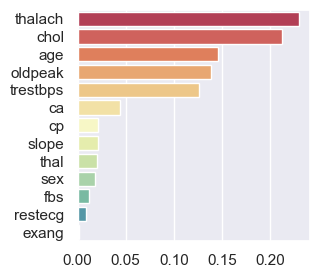

In [99]:
from prettytable import PrettyTable
feature_importance={}
ab_classifier.fit(X, y)
importance = ab_classifier.feature_importances_
metric_table = PrettyTable(["Feature Name", 'Co-effecient Score'])
for i,v in enumerate(importance):
    metric_table.add_row([features[i], round(v, 5)])
    feature_importance[features[i]]=v
print(metric_table)
feature_importance=sorted(feature_importance.items(), key=lambda x:x[1],reverse=True)
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(y=[feature_importance[i][0] for i in range(len(feature_importance)) ],x=[feature_importance[i][1] for i in range(len(feature_importance)) ],palette='Spectral')

## Logistic Regression

+--------------+--------------------+
| Feature Name | Co-effecient Score |
+--------------+--------------------+
|     age      |      0.01881       |
|     sex      |      -1.84579      |
|      cp      |      0.85817       |
|   trestbps   |      -0.01726      |
|     chol     |      -0.00825      |
|     fbs      |      0.55047       |
|   restecg    |      0.50645       |
|   thalach    |      0.02947       |
|    exang     |      -0.46796      |
|   oldpeak    |      -0.56756      |
|    slope     |      0.98755       |
|      ca      |      -1.7624       |
|     thal     |      -1.16801      |
+--------------+--------------------+


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

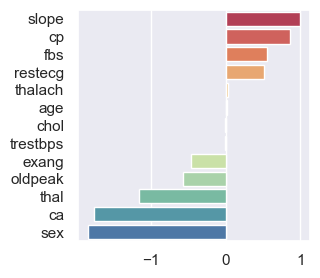

In [100]:
from prettytable import PrettyTable
feature_importance={}
lr_classifier.fit(X, y)
importance = lr_classifier.coef_[0]
metric_table = PrettyTable(["Feature Name", 'Co-effecient Score'])
for i,v in enumerate(importance):
    metric_table.add_row([features[i], round(v, 5)])
    feature_importance[features[i]]=v
print(metric_table)
feature_importance=sorted(feature_importance.items(), key=lambda x:x[1],reverse=True)
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(y=[feature_importance[i][0] for i in range(len(feature_importance)) ],x=[feature_importance[i][1] for i in range(len(feature_importance)) ],palette='Spectral')

## Decision Tree

+--------------+--------------------+
| Feature Name | Co-effecient Score |
+--------------+--------------------+
|     age      |      0.14892       |
|     sex      |      0.03487       |
|      cp      |      0.25538       |
|   trestbps   |      0.05633       |
|     chol     |       0.0643       |
|     fbs      |        0.0         |
|   restecg    |      0.01238       |
|   thalach    |      0.03106       |
|    exang     |      0.02369       |
|   oldpeak    |      0.13621       |
|    slope     |      0.04461       |
|      ca      |      0.11019       |
|     thal     |      0.08206       |
+--------------+--------------------+


<AxesSubplot:>

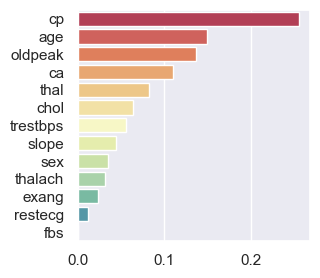

In [109]:
from prettytable import PrettyTable
feature_importance={}
dt_classifier.fit(X, y)
importance = dt_classifier.feature_importances_
metric_table = PrettyTable(["Feature Name", 'Co-effecient Score'])
for i,v in enumerate(importance):
    metric_table.add_row([features[i], round(v, 5)])
    feature_importance[features[i]]=v
print(metric_table)
feature_importance=sorted(feature_importance.items(), key=lambda x:x[1],reverse=True)
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(y=[feature_importance[i][0] for i in range(len(feature_importance)) ],x=[feature_importance[i][1] for i in range(len(feature_importance)) ],palette='Spectral')

## Random Forest

+--------------+--------------------+
| Feature Name | Co-effecient Score |
+--------------+--------------------+
|     age      |      0.10559       |
|     sex      |      0.04522       |
|      cp      |      0.11978       |
|   trestbps   |      0.07645       |
|     chol     |      0.09396       |
|     fbs      |      0.01083       |
|   restecg    |      0.01956       |
|   thalach    |      0.11219       |
|    exang     |      0.04064       |
|   oldpeak    |      0.11199       |
|    slope     |      0.04367       |
|      ca      |      0.10933       |
|     thal     |      0.11079       |
+--------------+--------------------+


<AxesSubplot:>

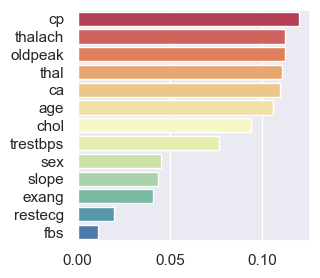

In [122]:
from prettytable import PrettyTable
feature_importance={}
rf_classifier.fit(X, y)
importance = rf_classifier.feature_importances_
metric_table = PrettyTable(["Feature Name", 'Co-effecient Score'])
for i,v in enumerate(importance):
    metric_table.add_row([features[i], round(v, 5)])
    feature_importance[features[i]]=v
print(metric_table)
feature_importance=sorted(feature_importance.items(), key=lambda x:x[1],reverse=True)
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(y=[feature_importance[i][0] for i in range(len(feature_importance)) ],x=[feature_importance[i][1] for i in range(len(feature_importance)) ],palette='Spectral')

# AUROC Plot

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [114]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [lr_classifier,mlp_classifier,ab_classifier,knn_classifier,dt_classifier,rf_classifier,]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

auc_values = [auc_roc_scores[2],auc_roc_scores[5],auc_roc_scores[0],auc_roc_scores[1],auc_roc_scores[3],auc_roc_scores[4]]
# Train the models and record the results
i=0
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = auc_values[i]
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    i=i+1
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\2092473796.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\2092473796.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resul

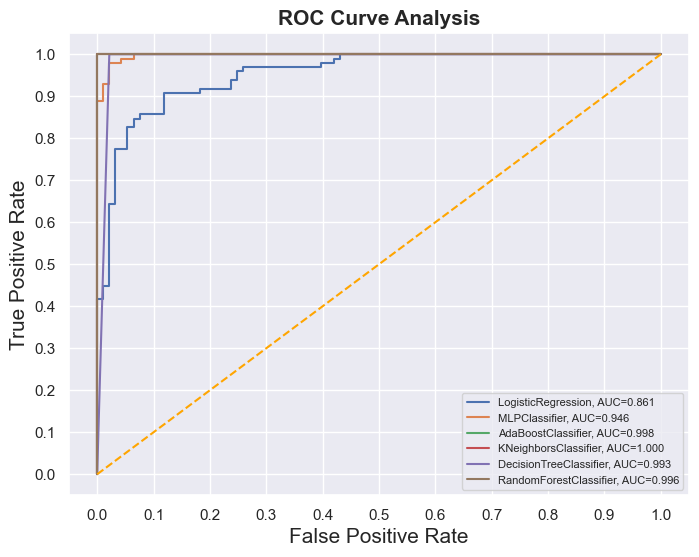

In [115]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(loc='best',fontsize=8)

plt.show()

# AUPRC Plot

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import auc,roc_curve, roc_auc_score,precision_recall_curve

# Instantiate the classfiers and make a list
classifiers = [lr_classifier,mlp_classifier,ab_classifier,knn_classifier,dt_classifier,rf_classifier,]

# Define a result table as a DataFrame
result_table1 = pd.DataFrame(columns=['classifiers', 'precision','recall','prc'])
prc_values = [auc_prc_scores[2],auc_prc_scores[5],auc_prc_scores[0],auc_prc_scores[1],auc_prc_scores[3],auc_prc_scores[4]]
i=0
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    precision,recall, _ = precision_recall_curve(y_test,  yproba)
    prc_val = prc_values[i]
    
    result_table1 = result_table1.append({'classifiers':cls.__class__.__name__,
                                        'precision':precision, 
                                        'recall':recall, 
                                        'prc':prc_val}, ignore_index=True)
    i=i+1
# Set name of the classifiers as index labels
result_table1.set_index('classifiers', inplace=True)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\3993737884.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table1 = result_table1.append({'classifiers':cls.__class__.__name__,
C:\Users\Shyam Sundar\AppData\Local\Temp\ipykernel_23236\3993737884.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

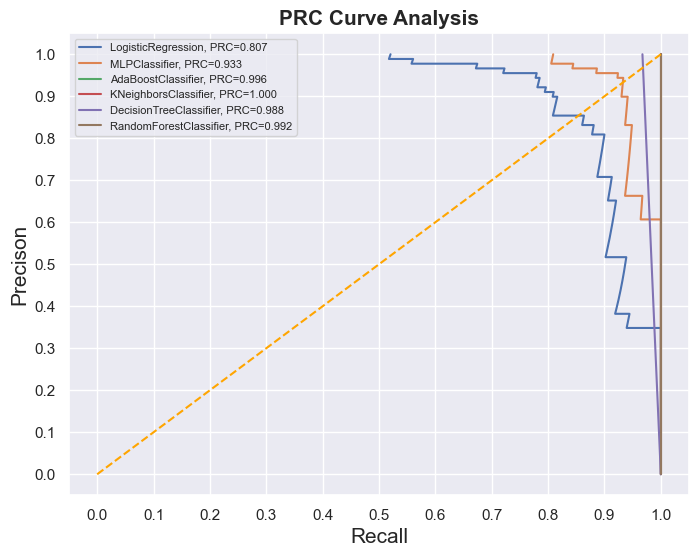

In [152]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table1.loc[i]['precision'],
            result_table1.loc[i]['recall'], 
              
             label="{}, PRC={:.3f}".format(i, result_table1.loc[i]['prc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precison", fontsize=15)

plt.title('PRC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(loc='best',fontsize=8)
plt.show()